## Practice lab: linear regression

### Problem statement:
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

You would like to expand your business to cities that may give your restaurant higher profits.
The chain already has restaurants in various cities and you have data for profits and populations from the cities.
You also have data on cities that are candidates for a new restaurant.
For these cities, you have the city population.
Can you use the data to help you identify which cities may potentially give your business higher profits?

### Code

#### Import libraries

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy

#### Load dataset

In [97]:
data = pd.read_csv("Data\ex1data1.csv",header=None)
x_train = data[0]
y_train = data[1]

print(f"First 5 entries in x(population of city) {x_train[:5]} and shape {np.shape(x_train)}")
print(f"First 5 entries in y(profit of a restaurant in that city) {y_train[:5]} and shape {np.shape(y_train)}")

First 5 entries in x(population of city) 0    6.1101
1    5.5277
2    8.5186
3    7.0032
4    5.8598
Name: 0, dtype: float64 and shape (97,)
First 5 entries in y(profit of a restaurant in that city) 0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: 1, dtype: float64 and shape (97,)


#### Plot functions

In [118]:
def plot_2d (figure, x ,y, plot_title, x_title, y_title, color="blue"):
    plt.figure(figure)
    plt.plot(x, y, c=color)
    plt.title(plot_title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)

def plot_scatter (figure, x ,y, plot_title, x_title, y_title, color="red",marker='x'):
    plt.figure(figure)
    plt.scatter(x, y, marker=marker, c=color)
    plt.title(plot_title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)



#### Plot the data we have

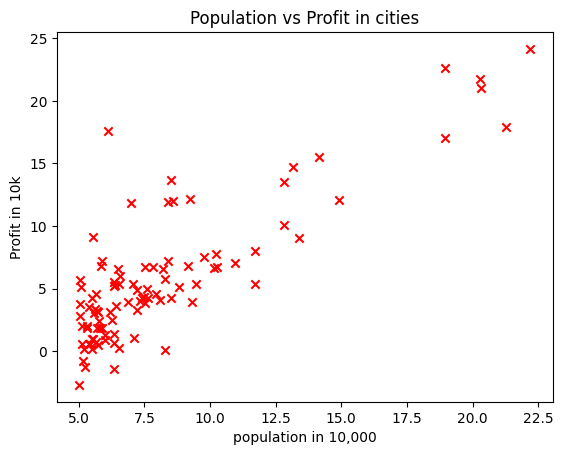

In [109]:
plot_scatter(1,x_train,y_train,"Population vs Profit in cities","population in 10,000","Profit in 10k")

#### Cost function(squared loss) 

In [99]:
def compute_cost(x,y,w,b):
    """
    Compute the cost for linear regression using mean square loss
    Args:
    x (ndarray): Shape (m,) Input to the model (Population of cities) 
    y (ndarray): Shape (m,) Label (Actual profits for the cities)
    w, b (scalar): Parameters of the model

    Returns:
    cost (float): The cost of using w,b as the parameters for linear regression
        to fit the data points in x and y
    """
    cost = 0
    m = len(x)
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    cost = (1/(2 * m)) * cost
    return cost

#### Compute gradient

In [100]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = len(x)
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

        
    return dj_dw, dj_db

#### Gradient descent

In [101]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b)  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

#### Main

Iteration    0: Cost     6.74   
Iteration  200: Cost     5.17   
Iteration  400: Cost     4.82   
Iteration  600: Cost     4.64   
Iteration  800: Cost     4.56   
Iteration 1000: Cost     4.52   
Iteration 1200: Cost     4.50   
Iteration 1400: Cost     4.49   
Iteration 1600: Cost     4.48   
Iteration 1800: Cost     4.48   
w,b found by gradient descent: 1.182212774757377 -3.7880685727231103


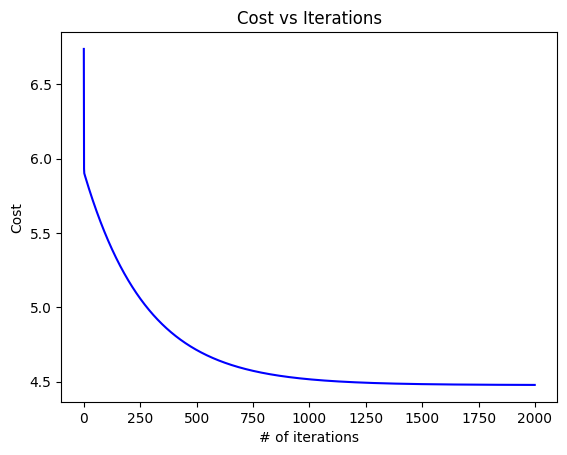

In [128]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 2000
alpha = 0.01

w,b,J_hist,w_hist = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)
plot_2d(2, np.arange(iterations),J_hist,"Cost vs Iterations","# of iterations", "Cost")

#### Predictions

For population = 35,000, we predict a profit of $3496.76
For population = 70,000, we predict a profit of $44874.21


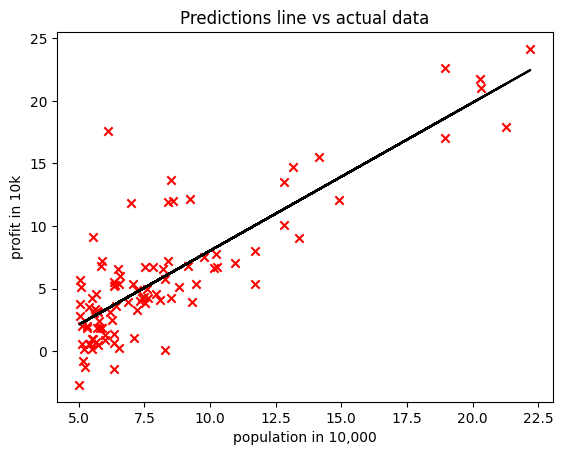

In [130]:
predictions = w * x_train + b
plot_scatter(3,x_train, y_train,"","","")
plot_2d(3,x_train,predictions,"Predictions line vs actual data","population in 10,000","profit in 10k","black")

predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))